**EXAM EXAMPLE (sistema grafici e unità di misura !!!!!!)**

In [44]:
#Import the useful packages
import pandas as pd 
import numpy as np 
import scipy.stats as levy
import scipy
import seaborn as sns 
import matplotlib.pyplot as plt
from fitter import Fitter

**Phase 1: preliminary analysis on the dataset**

In [2]:
#Read the dataset 
df = pd.read_csv("AB_NYC_2019(1).csv")

In [3]:
#Remove the NaN rows
df = df.dropna()

Text(0.5, 1.0, 'Accomodation prices boxplots per neighbourhood group')

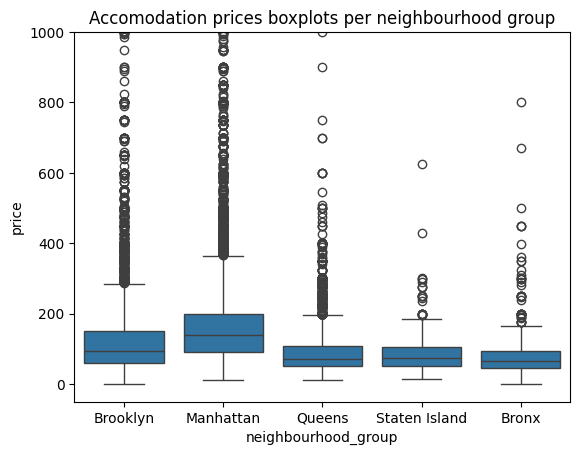

In [4]:
#Boxplot distributions per neighbourhood group
ax = sns.boxplot(data=df, x="neighbourhood_group", y="price")
ax.set_ylim([-50, 1000])
ax.set_title("Accomodation prices boxplots per neighbourhood group")

**Fig.1: Prices boxplot distributions for NYC neighbourhood groups.**

*The graph above shows that the distributions seem not to be Gaussian-like given the strong presence 
of outliers. It could be more useful either to show the boxplots without the outliers or to plot the histograms.*

Text(0.5, 1.0, 'Accomodation prices distribution in NYC')

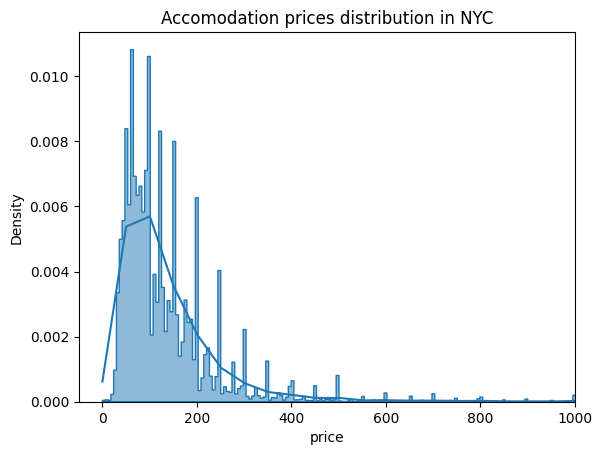

In [5]:
#Histplot for the accomodation prices (full)
g = sns.histplot(data=df, x="price", 
                 stat="density", kde=True,
                 cumulative=False, common_norm=False, element="step") 
g.set_xlim([-50, 1000])
g.set_title("Accomodation prices distribution in NYC")

**Fig.2: Full prices histplot with kernel density estimation.**

Text(0.5, 1.0, 'Accomodation prices distribution in NYC per neighbourhood group')

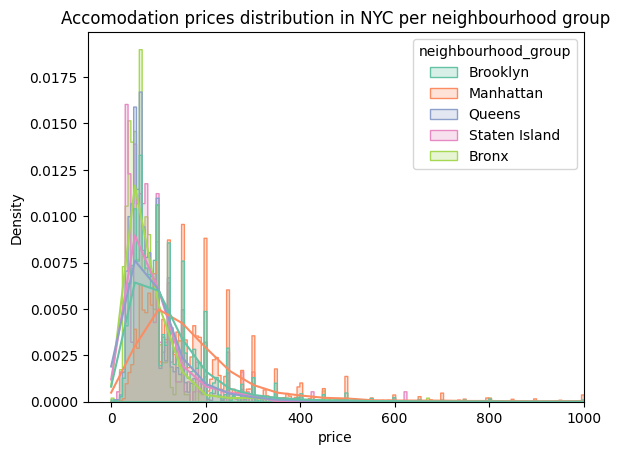

In [6]:
#Histplot for the accomodation prices divided by neighbourhood group in NYC
g = sns.histplot(data=df, x="price", hue="neighbourhood_group", 
                 stat="density", kde=True, palette="Set2",
                 cumulative=False, common_norm=False, element="step") 
g.set_xlim([-50, 1000])
g.set_title("Accomodation prices distribution in NYC per neighbourhood group")

**Fig.3: Prices histplots per neighbourhood group with kernel density estimation.**

Text(0.5, 1.0, 'Accomodation prices distribution in NYC per room type')

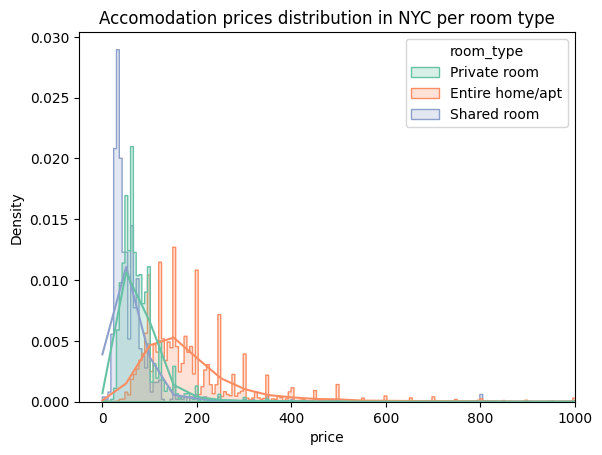

In [7]:
#Histplot for the accomodation prices divided by room_type
g = sns.histplot(data=df, x="price", hue="room_type", 
                 stat="density", kde=True, palette="Set2",
                 cumulative=False, common_norm=False, element="step") 
g.set_xlim([-50, 1000])
g.set_title("Accomodation prices distribution in NYC per room type")

**Fig.4: Prices histplots per room type with kernel density estimation.**

*Now let's divide the dataset per neighbourhood_group and per room_type and analyze the mean and standard deviation 
in order to investigate deeply the dataset.*

In [8]:
df_neighbourhood = df["neighbourhood_group"].unique()

In [9]:
means = np.array([])
std_dev = np.array([])
for i in df_neighbourhood: 
    df_appo = df[df["neighbourhood_group"] == i]
    means = np.append(means, df_appo["price"].mean())
    std_dev = np.append(std_dev, df_appo["price"].std())

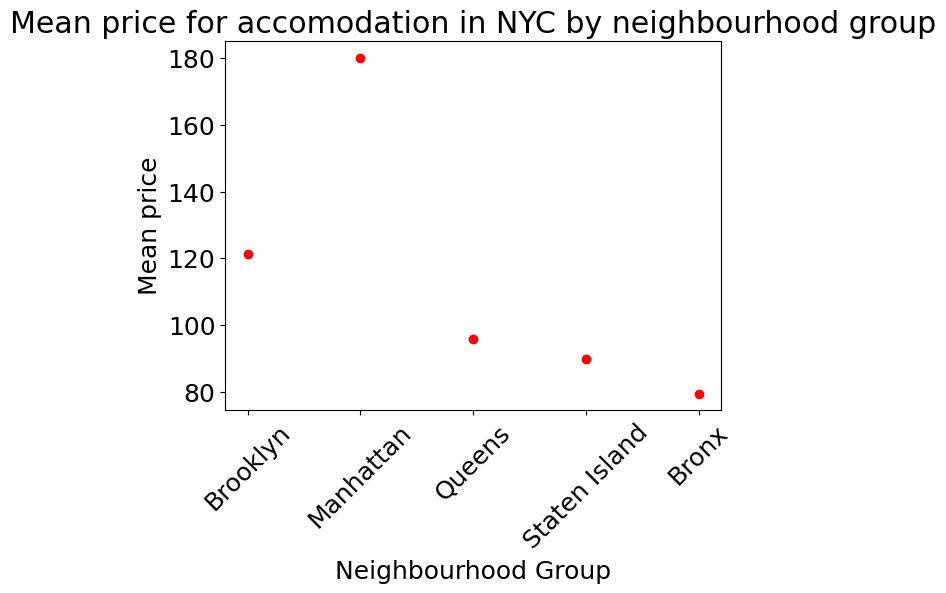

In [10]:
plt.rcParams.update({'font.size': 18})
plt.xlabel("Neighbourhood Group")
plt.ylabel("Mean price")
plt.title("Mean price for accomodation in NYC by neighbourhood group")
plt.xticks(rotation=45)
plt.scatter(df_neighbourhood, means, c="red")

**Fig.5: Mean accomodation price in the five different NYC neighbourhood groups.**

*The plot above shows that on average the accomodation costs are higher in Manhattan than in all the other neighbourhoods. On the contrary, the mean price for accomodation in Bronx reaches a minimum for NYC.*

In [11]:
df_room_type = df["room_type"].unique()

In [12]:
means = np.array([])
std_dev = np.array([])
for i in df_room_type: 
    df_appo = df[df["room_type"] == i]
    means = np.append(means, df_appo["price"].mean())
    std_dev = np.append(std_dev, df_appo["price"].std())

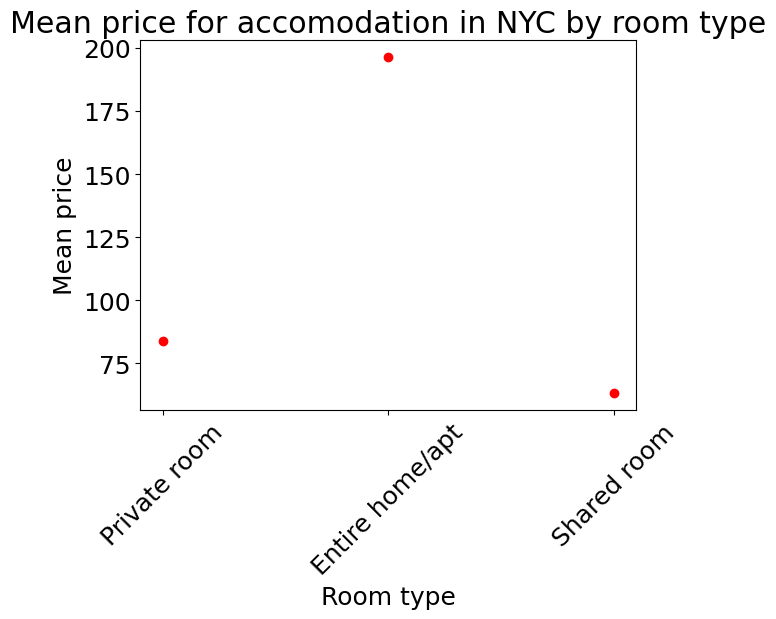

In [13]:
plt.rcParams.update({'font.size': 18})
plt.xlabel("Room type")
plt.ylabel("Mean price")
plt.title("Mean price for accomodation in NYC by room type")
plt.xticks(rotation=45)
plt.scatter(df_room_type, means, c="red")

**Fig.6: Mean accomodation price for three different room types in NYC.**

*As one may expect, the plot above shows that on average the accomodation expenses are way higher for an entire home than for a private room or a shared room.*

**Phase 2: let's start now with the investigation of the correlation between factors**

In [14]:
df = df.drop(['id', 'host_id', 'host_name'], axis=1)

In [15]:
df = df.drop(['name'], axis=1)

In [16]:
    df = df.drop(['last_review'], axis=1)

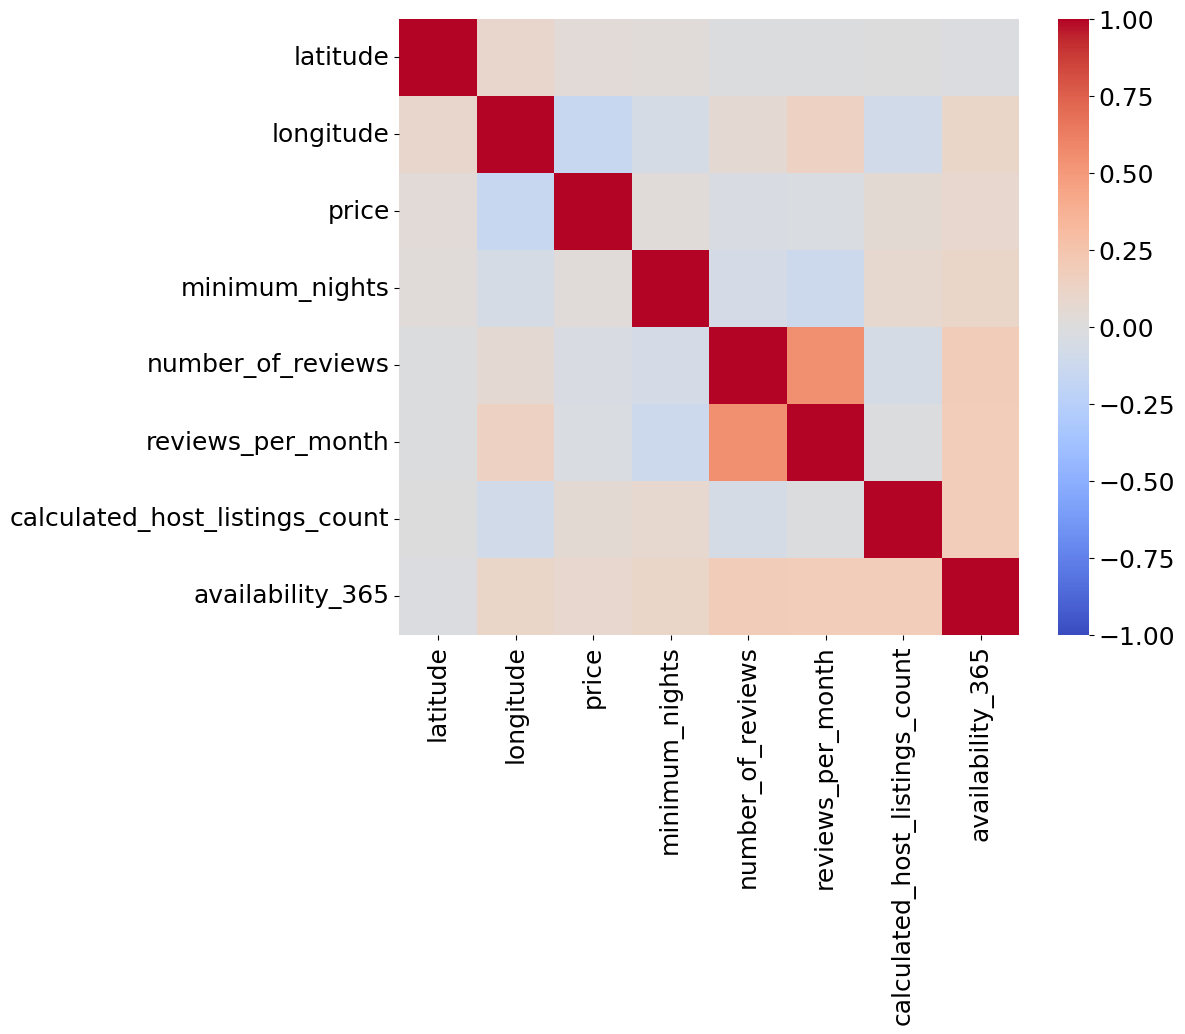

In [17]:
#Correlation plot through heatmap
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap((df.drop(['neighbourhood_group', 'neighbourhood', 'room_type'], axis=1).corr()), vmin=-1, vmax=1, 
                 cmap="coolwarm", #colormap divergente
                 ax=ax)

**Fig.7: Heatmap correlation plot among numeric factors of the dataset.**

*It seems that there's no strong correlation among factors except for the number of reviews and reviews per month.*

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type', 'price'], axis=1)

In [21]:
X

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,1,9,0.21,6,365
1,40.75362,-73.98377,1,45,0.38,2,355
3,40.68514,-73.95976,1,270,4.64,1,194
4,40.79851,-73.94399,10,9,0.10,1,0
5,40.74767,-73.97500,3,74,0.59,1,129
...,...,...,...,...,...,...,...
48782,40.78099,-73.95366,1,1,1.00,1,147
48790,40.75104,-73.81459,1,1,1.00,6,339
48799,40.54179,-74.14275,1,1,1.00,1,87
48805,40.80787,-73.92400,1,2,2.00,1,40


In [22]:
X = scaler.fit_transform(X)
X

array([[-1.46643168, -0.45448936, -0.28002045, ..., -0.69227218,
         0.03168465,  1.93095823],
       [ 0.46355446, -0.69864064, -0.28002045, ..., -0.59110014,
        -0.12039148,  1.85375501],
       [-0.78176214, -0.18442378, -0.28002045, ...,  1.94415218,
        -0.15841052,  0.61078322],
       ...,
       [-3.38859821, -4.10348013, -0.28002045, ..., -0.22211975,
        -0.15841052, -0.2152912 ],
       [ 1.45009688,  0.58144023, -0.28002045, ...,  0.3730099 ,
        -0.15841052, -0.57814631],
       [-0.54699232,  0.49555895, -0.28002045, ..., -0.22211975,
        -0.15841052, -0.87923886]])

In [23]:
df = df.drop(['room_type', 'price'], axis=1)

In [24]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,1,45,0.38,2,355
3,Brooklyn,Clinton Hill,40.68514,-73.95976,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,10,9,0.10,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...,...
48782,Manhattan,Upper East Side,40.78099,-73.95366,1,1,1.00,1,147
48790,Queens,Flushing,40.75104,-73.81459,1,1,1.00,6,339
48799,Staten Island,Great Kills,40.54179,-74.14275,1,1,1.00,1,87
48805,Bronx,Mott Haven,40.80787,-73.92400,1,2,2.00,1,40


In [25]:
dfx = pd.DataFrame(data=X,columns=df.columns[2:])

In [26]:
dfx

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,-1.466432,-0.454489,-0.280020,-0.421114,-0.692272,0.031685,1.930958
1,0.463554,-0.698641,-0.280020,0.326048,-0.591100,-0.120391,1.853755
2,-0.781762,-0.184424,-0.280020,4.995815,1.944152,-0.158411,0.610783
3,1.279884,0.153319,0.237554,-0.421114,-0.757736,-0.158411,-0.886959
4,0.355353,-0.510815,-0.165004,0.927929,-0.466123,-0.158411,0.108962
...,...,...,...,...,...,...,...
38816,0.961281,-0.053781,-0.280020,-0.587151,-0.222120,-0.158411,0.247928
38817,0.416637,2.924650,-0.280020,-0.587151,-0.222120,0.031685,1.730230
38818,-3.388598,-4.103480,-0.280020,-0.587151,-0.222120,-0.158411,-0.215291
38819,1.450097,0.581440,-0.280020,-0.566396,0.373010,-0.158411,-0.578146


In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=None)

In [29]:
dfx_pca = pca.fit(dfx)

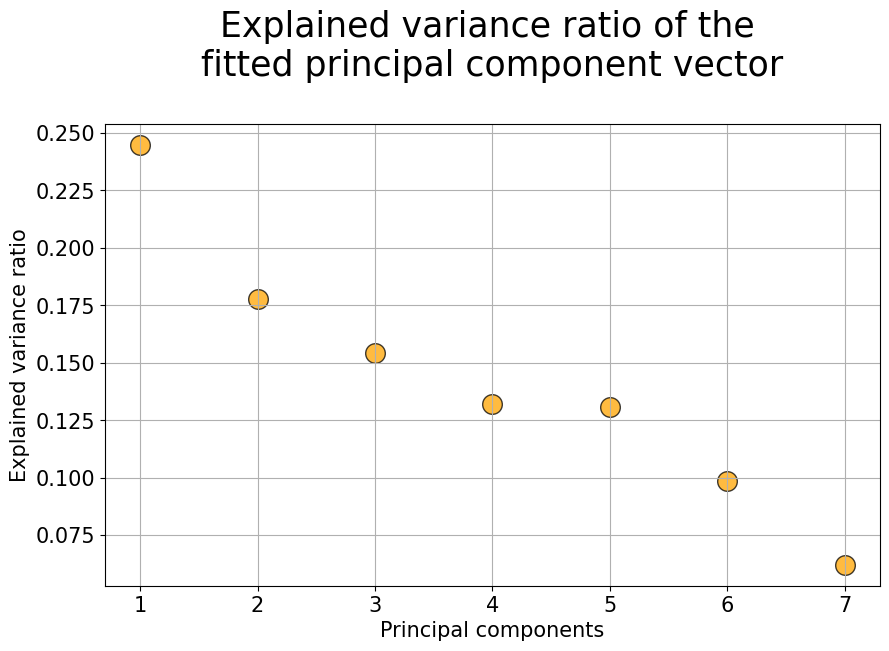

In [30]:
#Explained variance ratio with PCA
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

**Fig.8: Plot of the explained variance ratio obtained through the PCA analysis. The x-axis shows the principal components while the y-axis shows how much every single component contribute to the data dispersion.**

*The above figure suggests us that the first two factors (i.e. latitude and longitude) explain around 40% of the variance of the data.*

**Phase 3: fit of the distribution**

In [31]:
#Read again the full dataset
df_fit = pd.read_csv("AB_NYC_2019(1).csv")

In [32]:
df_fit = df_fit.dropna()

In [33]:
df_fit

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


(-10.0, 1000.0)

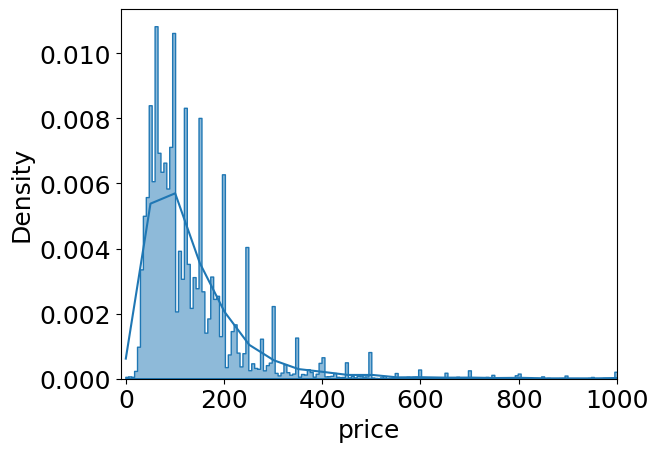

In [34]:
g = sns.histplot(data=df_fit, x="price", 
                 stat="density", kde=True,
                 cumulative=False, common_norm=False, element="step") 
g.set_xlim([-10, 1000])

In [35]:
df_fit = df_fit.drop(['id','name','host_id', 'host_name'], axis=1)

In [36]:
params = scipy.stats.beta.fit(df_fit.price)

/home/francesco/.local/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/francesco/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [37]:
params

(2.067762216937715, 66439329.24835694, -0.10396586875283223, 4570710536.067926)

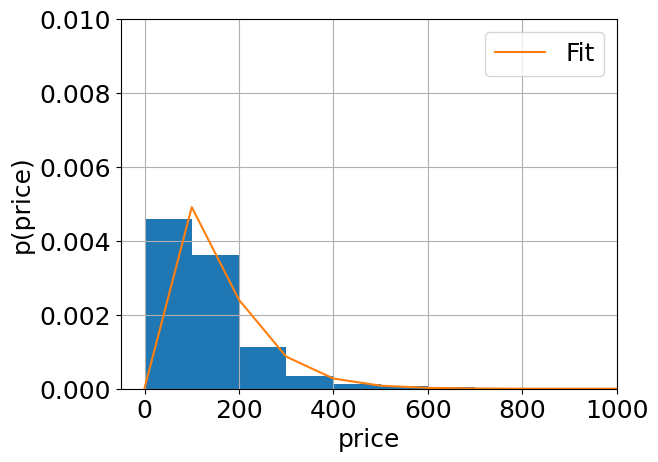

In [38]:
plt.rcParams.update({'font.size': 18})
xmin = np.min(df_fit.price)
xmax = np.max(df_fit.price)
x = np.linspace(xmin,xmax,101)
# Istogramma di tutti i dati
df_fit.price.hist(bins=100, density=True)
# fit
B = scipy.stats.beta(params[0], params[1], params[2], params[3])
plt.plot(x, B.pdf(x), label="Fit")
plt.xlabel('price')
plt.ylabel('p(price)')
plt.xlim([-50, 1000])
plt.ylim([0, 0.01])
plt.legend()

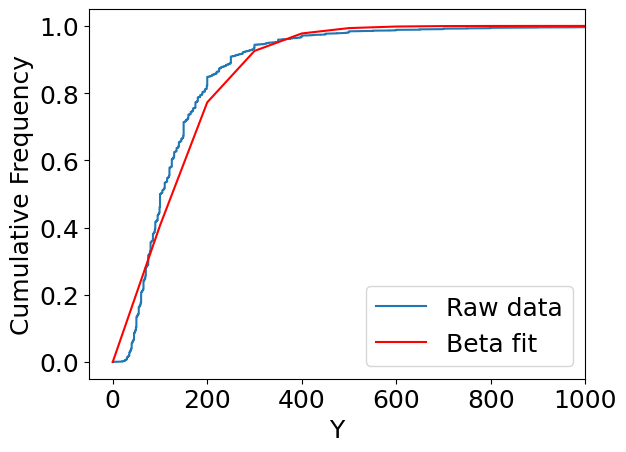

In [42]:
#Cumulative distributions
xmin = np.min(df_fit.price)
xmax = np.max(df_fit.price)
x = np.linspace(xmin,xmax,101)
y = np.sort(df_fit.price)
idx = [i/len(y) for i in range(len(y))]
plt.xlabel('Y')
plt.ylabel('Cumulative Frequency')
plt.xlim([-50,1000])
plt.plot(y,idx,label="Raw data")
plt.plot(x, B.cdf(x), label="Beta fit", color="red")
plt.legend()

**Phase 4: Significance test**

*In this section we test the goodness of the previous fit using the KS test, since it has no assumptions on the variables. We set a significance level at $\alpha$ = 0.01.*

In [43]:
yy=df_fit.price.to_numpy()
scipy.stats.kstest(yy, 
                  lambda x: 
                   scipy.stats.beta.cdf
                   (x, params[0], params[1], params[2], params[3]))

KstestResult(statistic=0.09333464457875246, pvalue=9.158488142232364e-295, statistic_location=100, statistic_sign=1)

*Since the p-value < $\alpha$, we can reject the hypothesis that the accomodation prices in NYC are distributed according to a Beta distribution.*

*Let's fit the data with other possible distributions using the Fitter class.*

2024-01-25 11:41:47.225 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-01-25 11:41:47.927 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=3.3e-05)
2024-01-25 11:41:48.143 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=2.8e-05)
2024-01-25 11:41:48.338 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=3e-05)
2024-01-25 11:41:49.341 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=3.5e-05)
2024-01-25 11:41:49.593 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=2.4e-05)
2024-01-25 11:41:50.017 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted betaprime distribution with error=3e-06)
2024-01-25 11:41:50.163 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,2.179800e-07,14545.924910,14580.191777,inf,0.093335,9.158488e-295
moyal,2.433253e-07,13510.002253,13527.135686,inf,0.096578,1.279098e-315
rel_breitwigner,2.915120e-07,3582.979054,3608.679204,inf,0.130669,0.000000e+00
genexpon,4.769063e-07,10869.107908,10911.941491,inf,0.076777,1.787758e-199
genhalflogistic,5.364939e-07,11707.823112,11733.523262,inf,0.159318,0.000000e+00


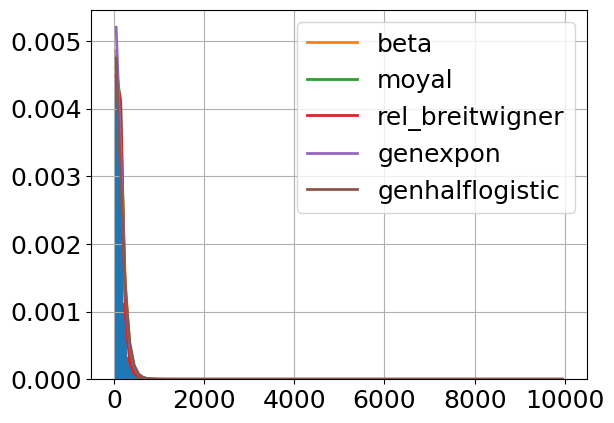

In [45]:
f = Fitter(df_fit.price)
f.fit()
f.summary()

**Final comments**

*From the quantitative analysis in the first half of the notebook we see that the accomodation prices follow the same distribution (with different shape parameters) if we divide them either by neighbourhood group or room type (see Fig.3 and Fig.4). 
Moreover, Fig.5 and Fig.6 tell us that Manhattan is the most expensive neighbourhood in NYC and the entire home/apartment is the most expensive accomodation in the city (on average).
Regarding the correlation among factors, it seems that the factors are not evidently correlated with the exception of the number of reviews and the reviews per month, while on the other hand around 40% of the variance of the prices could be explained by latitude and longitude (therefore by the neighbourhood group itself).
For what concerns the fit of the distribution, we are not so lucky: setting the significance level $\alpha$ = 0.01 and trying to fit a set of distributions, we obtain that none of the distributions tested are above the level and therefore we have to reject all the null hypothesis (with the Fitter class we can test a set of distributions and rank them in terms of the error).*